<a href="https://colab.research.google.com/github/yuki0703-sudo/Research/blob/main/BeamVibrationSimulation_FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [ ]:
!pip install ita

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#import ita
import sympy as sp

#Define physical property value

In [ ]:
d=1000 #density kg/m^3
A=0.06 #area: m^2
l=3 #length m
P=5.3*10**3 #force for the plate
E=2.0*10**9 #Young's coefficient
I=5*10**(-5) #Izz:(m^4)
m=A*l*d

#init condition
x=np.arange(0,105)
delta_x=l/len(x) #delta_x=0.1 m
delta_t=1e-7   #delata_t=1 s
time_step =2000  #time_step
a=-E*I/(d*A)
c=a*delta_t**2/delta_x**4

#mathematical model coefficient
a=-E*I/(d*A)
print(a)
print(a*delta_t**2/delta_x**4)
c=a*delta_t**2/delta_x**4

#eigen frequency
freq=[]
ramuda = [1.875, 4.694,7.855]
for i in ramuda:
  f=i**2/(2*np.pi*l**2)*(E*I/d/A)**(1/2)
  freq.append(f)
print(freq)
eigen_freq=1/2/np.pi*(3*E*I/m/l**3)**(1/2)
print(eigen_freq)

-1666.6666666666667
-2.5010416666666667e-05
[2.5380755248492064, 15.906995841432567, 44.54452946790657]
1.2504393279959807


#Beam Deformation Simulation

In [ ]:
#initial board shape
def shape(x):
  return -P/(6*E*I)*(x**3-3*l*x**2)*10**3

shape(2)

247.33333333333334

In [ ]:
#init condition
x=np.arange(0,105)
delta_x=3/len(x) #delta_x=0.1 m
delta_t=1e-7   #delata_t=1 s
time_step =2000  #time_step
c=a*delta_t**2/delta_x**4
y=np.zeros(len(x))
#print(y)
for i in range(2,len(x)):
  y[i]=int(shape(delta_x*i))
print(y[len(x)-1])

470.0


In [ ]:
##make simultation model: beam vibration
def beam_vib(y_2,y_1): #y: displacement,y_1=y[t-1],y_2=y[t-2]:pass displacement
  length=len(y_2)
  new_y=np.zeros(length)
  for i in range(2,length): #for 0,1, displacement is 0 because of boundary condition
    if i<= length-3:
      new_y[i]=2*y_1[i]-y_2[i]+a*delta_t**2/delta_x**4*(y_1[i+2]-4*y_1[i+1]+6*y_1[i]-4*y_1[i-1]+y_1[i-2])
    else:
      new_y[i]+=new_y[i-1]+(new_y[i-1]-new_y[i-2])
  return new_y

new_y=beam_vib(y,y)
print(new_y[-1])

470.0000500208333


In [ ]:
##prepare for simulation : make an array
simulation=np.arange((time_step+2)*len(y)).reshape((time_step+2,len(y))) #+2 : because array includes 2 initial conditions
simulation[0]=y
simulation[1]=y
#print(simulation)

In [ ]:
##simulation
for i in range(2,time_step+2):
  new_y=beam_vib(simulation[i-2],simulation[i-1])
  simulation[i]=new_y

#print(simulation.shape)
print(simulation[-15:-5 , :])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


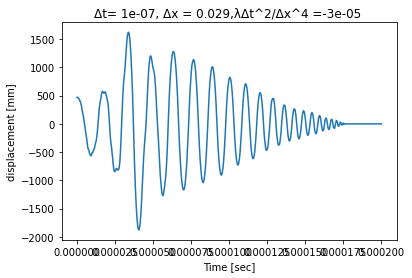

In [ ]:
#端点の軌跡

#時間軸の設定
time=np.zeros(time_step+2)
for i in range(len(time)):
  time[i]=delta_t*i

plt.plot(time,simulation[:,-1])
plt.xlabel("Time [sec]")
plt.ylabel("displacement [mm]")
plt.title("Δt= {}, Δx = {},λΔt^2/Δx^4 ={} ".format(delta_t,round(delta_x,3),round(c,5))) #c: descritization coefficient
plt.show()

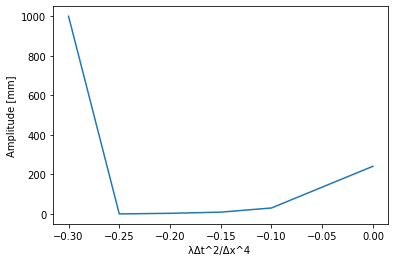

In [ ]:
x=[0,-0.1,-0.15,-0.2,-0.25,-0.3]
y=[241,30, 9,3,0,1000]
plt.plot(x,y)
plt.xlabel("λΔt^2/Δx^4 ")
plt.ylabel("Amplitude [mm]")
plt.show()

In [ ]:
km=(50000*2*np.pi)**(1/2)*(d*A/E/I)**(-1/4)
print(km*l)
print(np.cos(km*l))
print(np.cosh(km*l))
r=1+np.cos(3)*np.cosh(36)
print(r)

10743.81146123515
0.9066954829899511
inf
-2134043441375585.2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in cosh
  after removing the cwd from sys.path.


In [ ]:
pm=(4.6941**2)/3**2*(E*I/d/A)**(1/2)
print(pm)

99.95086108089555


In [ ]:
a=(E*I/d/A)**(1/2)
print(a)
f=a/2/np.pi
print(f)


40.824829046386306
6.497473343613969


#FFT(Fast Fourier Transformation)

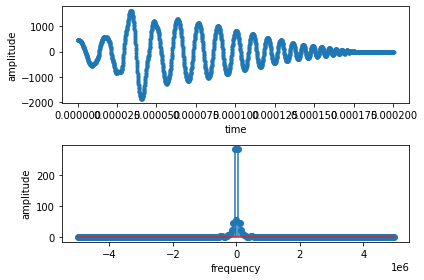

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift

#サンプリング周波数 : fs
fs=1e7

#時間ポイント
t=np.arange(0,2.002e-4,1/fs)

#信号
x=simulation[:,-1]

# ------------------------------------------------------
# FFTサンプル点数(>1周期の時間ポイント数)
N = 200
# FFT実行(N点)
X = fft(x, N)
# 周波数軸の生成
# 1[周波数index]あたりの周波数間隔df=fs/N
df = fs/N

# ------------------------------------------------------
# FFTシフト
Shifted_X = fftshift(X)
# FFTシフト後の[周波数index]生成(//は整数割り)
Shifted_sampleIndex = np.arange(-N//2, N//2)
# FFTシフト後の[周波数index] --> 周波数間隔dfへ
Shifted_f = Shifted_sampleIndex*df

# ------------------------------------------------------
# プロット(ax[0]:時間波形，ax[1]:周波数波形)
fig, ax = plt.subplots(2)
ax[0].plot(t, x, ".-")
ax[0].set_xlabel("time"), ax[0].set_ylabel("amplitude")
ax[1].stem(Shifted_f, np.abs(Shifted_X)/N, use_line_collection=True)
ax[1].set_xlabel("frequency"), ax[1].set_ylabel("amplitude")
plt.tight_layout()
plt.show()

In [ ]:
freq=0
for i in range(0,len(Shifted_f)):
  if np.abs(Shifted_X[i])/N >freq:
    freq=Shifted_f[i]
print(freq)

50000.0
